In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load Data

In [2]:
DATA_PATH = '../fakenewsnet_dataset'
DATASET_NAME = 'politifact'
DATASET_PATH = '{}/{}'.format(DATA_PATH, DATASET_NAME)
REAL_DATA_PATH = '{}/real'.format(DATASET_PATH)
FAKE_DATA_PATH = '{}/fake'.format(DATASET_PATH)

In [3]:
def load_json_from_file(path):
    with open(path) as json_file:
        data = json.load(json_file)
    return data

In [4]:
class Article():
    def __init__(self, name, path):
        self.path = path
        self.name = name
        self.content = None
        self.tweets = []
        
    def load_content(self):
        content_path = "{}/news content.json".format(self.path)
        if os.path.isfile(content_path):
            self.content = load_json_from_file(content_path)
    
    def load_tweets(self):
        tweets_path = "{}/tweets".format(self.path)
        if os.path.isdir(tweets_path):
            tweets_files = os.listdir(tweets_path)
            self.tweets = [load_json_from_file("{}/{}".format(tweets_path, file)) for file in tweets_files]

In [5]:
def load_single_article(name, path):
    art = Article(name, path)
    art.load_content()
    art.load_tweets()
    return art

def load_all_articles(path):
    articles = []
    if os.path.isdir(path):
        articles_files = os.listdir(path)
        articles = [load_single_article(file, "{}/{}".format(path, file)) for file in articles_files]
    return articles

In [6]:
fake_arts = load_all_articles(FAKE_DATA_PATH)
real_arts = load_all_articles(REAL_DATA_PATH)

In [7]:
def plot_pie(data, labels, title):
    wedges, texts, autotexts = plt.pie(data,
        labels=labels,
        autopct=lambda pct:"{:.1f}%".format(pct), textprops=dict(color="black"))
    plt.setp(autotexts, size=14, weight="bold")
    plt.title(title)
    plt.show()

In [8]:
def plot_hist(data, title):
    plt.hist(data, bins = 100)
    plt.title(title)
    plt.show()

In [9]:
def average(lst):
    return sum(lst)/len(lst)

Fake:  432
Real:  624


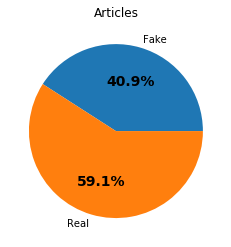

In [10]:
fake_arts_len = len(fake_arts)
real_arts_len = len(real_arts)
print("Fake: ", fake_arts_len)
print("Real: ", real_arts_len)
plot_pie([fake_arts_len, real_arts_len], ['Fake', 'Real'], "Articles")

# Check content present

In [11]:
fake_arts_with_content = [art for art in fake_arts if art.content is not None]
real_arts_with_content = [art for art in real_arts if art.content is not None]

Fake:  406 0.9398148148148148
Real:  399 0.6394230769230769
Total:  805 0.7623106060606061


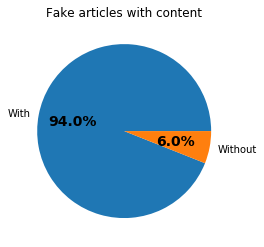

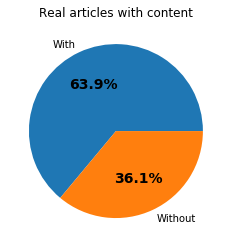

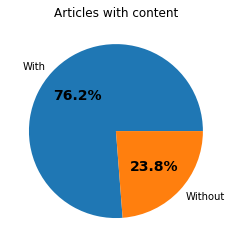

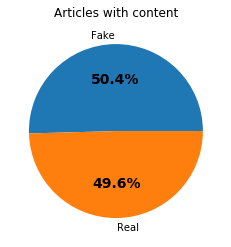

In [12]:
fake_arts_with_content_len = len(fake_arts_with_content)
fake_arts_with_content_ratio = fake_arts_with_content_len/fake_arts_len
fake_arts_without_content_len = fake_arts_len - fake_arts_with_content_len

real_arts_with_content_len = len(real_arts_with_content)
real_arts_with_content_ratio = real_arts_with_content_len/real_arts_len
real_arts_without_content_len = real_arts_len - real_arts_with_content_len

arts_with_content_len = real_arts_with_content_len + fake_arts_with_content_len
arts_without_content_len = real_arts_without_content_len + fake_arts_without_content_len


print("Fake: ", fake_arts_with_content_len, fake_arts_with_content_ratio)
print("Real: ", real_arts_with_content_len, real_arts_with_content_ratio)
print("Total: ", arts_with_content_len, arts_with_content_len/(arts_with_content_len+arts_without_content_len))

plot_pie([fake_arts_with_content_len, fake_arts_without_content_len], ['With', 'Without'], "Fake articles with content")
plot_pie([real_arts_with_content_len, real_arts_without_content_len], ['With', 'Without'], "Real articles with content")
plot_pie([arts_with_content_len, arts_without_content_len], ['With', 'Without'], "Articles with content")
plot_pie([fake_arts_with_content_len, real_arts_with_content_len], ['Fake', 'Real'], "Articles with content")

# Check sources

In [13]:
fake_source = [art.content['source'] for art in fake_arts_with_content]
real_source = [art.content['source'] for art in real_arts_with_content]
fake_source_dict = Counter(fake_source)
real_source_dict = Counter(real_source)
fake_source_counter = list(fake_source_dict.items())
real_source_counter = list(real_source_dict.items())
fake_source_counter.sort(key=lambda x: x[1])
real_source_counter.sort(key=lambda x: x[1])

In [14]:
fake_arts_with_content[0].content.keys()

dict_keys(['url', 'text', 'images', 'top_img', 'keywords', 'authors', 'canonical_link', 'title', 'meta_data', 'movies', 'publish_date', 'source', 'summary'])

In [15]:
print(fake_arts_with_content[0].content["source"])
print(fake_arts_with_content[0].content["url"])
print(fake_arts_with_content[0].content["canonical_link"])

https://web.archive.org
https://web.archive.org/web/20170808064733/https://newsbreakshere.com/nyc-physician-wife-jump-deathleave-kids-behind-cant-afford-health-care-hours-mccain-murkowski-collins-every-democrat-voted
https://web.archive.org/web/20170808064733/https://newsbreakshere.com/nyc-physician-wife-jump-deathleave-kids-behind-cant-afford-health-care-hours-mccain-murkowski-collins-every-democrat-voted


In [16]:
test_art = [art for art in fake_arts_with_content if art.content["source"] != 'https://web.archive.org'][0]
print(test_art.content["source"])
print(test_art.content["url"])
print(test_art.content["canonical_link"])

https://www.facebook.com
https://www.facebook.com/RealTrumpNation/photos/a.744441295687017.1073741829.735823829882097/1283240148473793/?type=3&theater
https://www.facebook.com/RealTrumpNation/photos/-and-this-is-why-we-dont-watch-cnn-they-are-bat-shit-crazy-share-if-you-agree/1283240148473793/


fake:  [('http://forfreedomworld.com', 1), ('http://usanewscentral.com', 1), ('https://www.inverse.com', 1), ('https://zimbabwe-today.com', 1), ('http://usa24info.com', 1)]
fake:  [('http://thehill.com', 4), ('https://yournewswire.com', 4), ('http://www.react365.com', 4), ('https://www.facebook.com', 6), ('https://web.archive.org', 169)]
fake 1:  154
fake more than 1:  33

real:  [('http://findarticles.com', 1), ('http://www.epi.org', 1), ('http://www.gpo.gov', 1), ('https://apnews.com', 1), ('http://www.realclearpolitics.com', 1)]
real:  [('http://www.cq.com', 12), ('http://www.nytimes.com', 15), ('http://abcnews.go.com', 18), ('http://www.youtube.com', 25), ('https://web.archive.org', 122)]
real 1:  76
real more than 1:  38


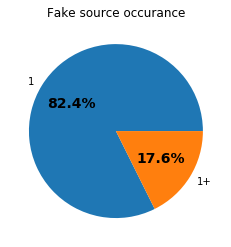

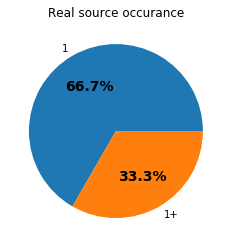

In [17]:
print("fake: ", fake_source_counter[0:5])
print("fake: ", fake_source_counter[-5:])
print("fake 1: ", len([e for e in fake_source_counter if e[1] == 1]))
print("fake more than 1: ", len([e for e in fake_source_counter if e[1] > 1]))
print()
print("real: ", real_source_counter[0:5])
print("real: ", real_source_counter[-5:])
print("real 1: ", len([e for e in real_source_counter if e[1] == 1]))
print("real more than 1: ", len([e for e in real_source_counter if e[1] > 1]))

plot_pie([len([e for e in fake_source_counter if e[1] == 1]), len([e for e in fake_source_counter if e[1] > 1])], ['1', '1+'], "Fake source occurance")
plot_pie([len([e for e in real_source_counter if e[1] == 1]), len([e for e in real_source_counter if e[1] > 1])], ['1', '1+'], "Real source occurance")

('http://thehill.com', 0.6666666666666666)
('https://web.archive.org', 0.5807560137457045)
('http://www.businessinsider.com', 0.5)
('http://nymag.com', 0.5)
('https://www.washingtonpost.com', 0.3333333333333333)
('http://time.com', 0.25)
('http://www.washingtonpost.com', 0.25)
('https://www.youtube.com', 0.2)
('http://www.cnn.com', 0.16666666666666666)
('http://www.politifact.com', 0.15384615384615385)
('https://twitter.com', 0.14285714285714285)
('https://medium.com', 0.1111111111111111)
Mix:  12
Fake:  175
Real:  102


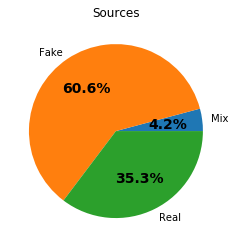

In [18]:
mix_sources = []
for e in fake_source_dict:
    if e in real_source_dict:
        mix_sources.append((e, fake_source_dict[e]/(fake_source_dict[e] + real_source_dict[e])))

mix_sources.sort(key=lambda x: -x[1])

for e in mix_sources:
    print(e)
        
print("Mix: ", len(mix_sources))
print("Fake: ", len(fake_source_dict.keys()) - len(mix_sources))
print("Real: ", len(real_source_dict.keys()) - len(mix_sources))

plot_pie([len(mix_sources), len(fake_source_dict.keys()) - len(mix_sources), len(real_source_dict.keys()) - len(mix_sources)], ['Mix', 'Fake', 'Real'], "Sources")

# Check tweets

In [19]:
fake_tweets = [len(art.tweets) for art in fake_arts_with_content]
real_tweets = [len(art.tweets) for art in real_arts_with_content]
fake_tweets_counter = list(Counter(fake_tweets).items())
real_tweets_counter = list(Counter(real_tweets).items())
fake_tweets_counter.sort()
real_tweets_counter.sort()

Fake:  183 0.45073891625615764
Real:  262 0.656641604010025
Total:  445 0.5527950310559007


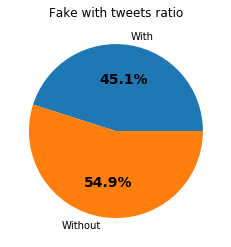

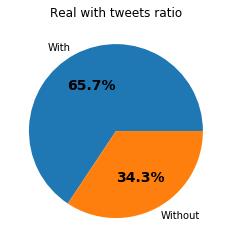

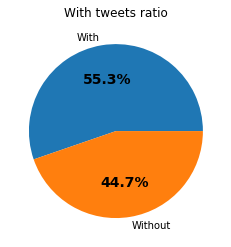

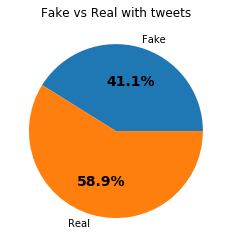

In [20]:
fake_tweets_len = len([e for e in fake_tweets if e > 0])
fake_tweets_ratio = fake_tweets_len/fake_arts_with_content_len
fake_tweets_without_len = fake_arts_with_content_len - fake_tweets_len

real_tweets_len = len([e for e in real_tweets if e > 0])
real_tweets_ratio = real_tweets_len/real_arts_with_content_len
real_tweets_without_len = real_arts_with_content_len - real_tweets_len

arts_tweets_len = real_tweets_len + fake_tweets_len
arts_without_tweets_len = real_tweets_without_len + fake_tweets_without_len


print("Fake: ", fake_tweets_len, fake_tweets_ratio)
print("Real: ", real_tweets_len, real_tweets_ratio)
print("Total: ", arts_tweets_len, arts_tweets_len/(arts_tweets_len+arts_without_tweets_len))

plot_pie([fake_tweets_len, fake_tweets_without_len], ['With', 'Without'], "Fake with tweets ratio")
plot_pie([real_tweets_len, real_tweets_without_len], ['With', 'Without'], "Real with tweets ratio")
plot_pie([arts_tweets_len, arts_without_tweets_len], ['With', 'Without'], "With tweets ratio")
plot_pie([fake_tweets_len, real_tweets_len], ['Fake', 'Real'], "Fake vs Real with tweets")

fake:  [(0, 223), (1, 11), (2, 4), (3, 2), (4, 2)]
fake:  [(2430, 1), (4306, 1), (6096, 1), (9999, 1), (24437, 1)]

real:  [(0, 137), (1, 12), (2, 15), (3, 6), (4, 7)]
real:  [(12104, 1), (14510, 1), (16302, 1), (17234, 1), (23223, 1)]


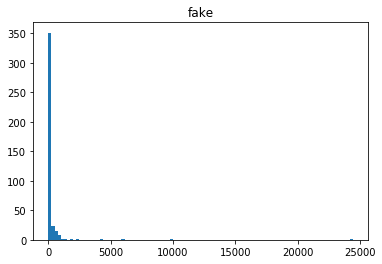

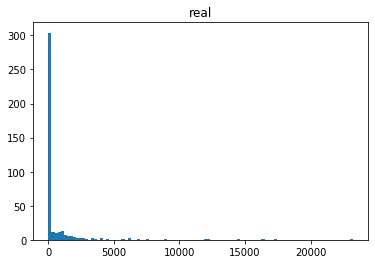

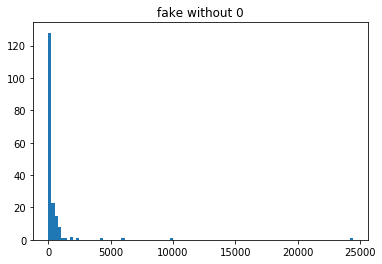

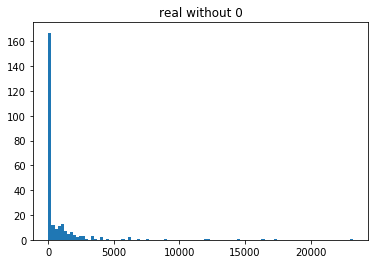

In [21]:
print("fake: ", fake_tweets_counter[0:5])
print("fake: ", fake_tweets_counter[-5:])
print()
print("real: ", real_tweets_counter[0:5])
print("real: ", real_tweets_counter[-5:])

plot_hist(fake_tweets, "fake")
plot_hist(real_tweets, "real")

plot_hist([e for e in fake_tweets if e > 0], "fake without 0")
plot_hist([e for e in real_tweets if e > 0], "real without 0")

In [22]:
fake_tweets_data = [item for art in fake_arts_with_content for item in art.tweets]
real_tweets_data = [item for art in real_arts_with_content for item in art.tweets]

In [23]:
fake_tweets_data[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

Fake tweets:  86606
Real tweets:  258923


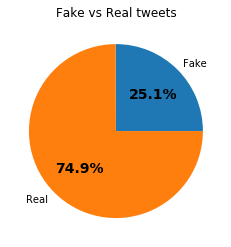

In [24]:
print("Fake tweets: ", len(fake_tweets_data))
print("Real tweets: ", len(real_tweets_data))

plot_pie([len(fake_tweets_data), len(real_tweets_data)], ['Fake', 'Real'], "Fake vs Real tweets")

# Check users

In [25]:
fake_users = [tweet['user']['id'] for tweet in fake_tweets_data]
real_users = [tweet['user']['id'] for tweet in real_tweets_data]
fake_users_dict = Counter(fake_users)
real_users_dict = Counter(real_users)
fake_users_counter = list(fake_users_dict.items())
real_users_counter = list(real_users_dict.items())
fake_users_counter.sort(key=lambda x: x[1])
real_users_counter.sort(key=lambda x: x[1])

fake:  [(85738930, 1), (868322115656704000, 1), (369763286, 1), (22158652, 1), (2906698284, 1)]
fake:  [(4110358398, 152), (1911303422, 179), (18000449, 199), (144222146, 270), (710856880680275969, 314)]
fake 1:  45024
fake more than 1:  10450

real:  [(720902329, 1), (45247024, 1), (23991082, 1), (1048504471, 1), (21344248, 1)]
real:  [(490790309, 499), (1044725409953136640, 521), (2161036874, 609), (894687595527057415, 1342), (871466086293794817, 1363)]
real 1:  131552
real more than 1:  32749


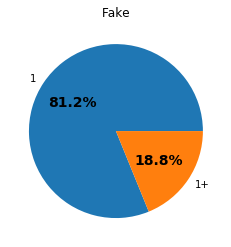

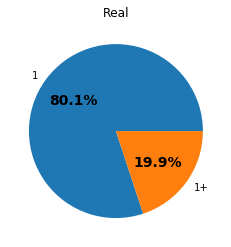

In [26]:
print("fake: ", fake_users_counter[0:5])
print("fake: ", fake_users_counter[-5:])
print("fake 1: ", len([e for e in fake_users_counter if e[1] == 1]))
print("fake more than 1: ", len([e for e in fake_users_counter if e[1] > 1]))
print()
print("real: ", real_users_counter[0:5])
print("real: ", real_users_counter[-5:])
print("real 1: ", len([e for e in real_users_counter if e[1] == 1]))
print("real more than 1: ", len([e for e in real_users_counter if e[1] > 1]))

plot_pie([len([e for e in fake_users_counter if e[1] == 1]), len([e for e in fake_users_counter if e[1] > 1])], ['1', '1+'], "Fake")
plot_pie([len([e for e in real_users_counter if e[1] == 1]), len([e for e in real_users_counter if e[1] > 1])], ['1', '1+'], "Real")

(23772575, 0.9925925925925926)
(22926891, 0.989247311827957)
(2309297431, 0.9838709677419355)
(1911303422, 0.9835164835164835)
(2406059855, 0.9807692307692307)
(286442000, 0.98)
(750367298, 0.9787234042553191)
(2993395879, 0.975)
(2346152484, 0.9736842105263158)
(2576532410, 0.9736842105263158)

(14612434, 0.018867924528301886)
(146665882, 0.017857142857142856)
(33267001, 0.015625)
(750709443126562816, 0.015625)
(836247219472781312, 0.014084507042253521)
(967064304020111361, 0.012987012987012988)
(15073620, 0.011363636363636364)
(1079911297, 0.010752688172043012)
(30068057, 0.010416666666666666)
(182301577, 0.008547008547008548)
Mix:  8891
Fake:  46583
Real:  155410


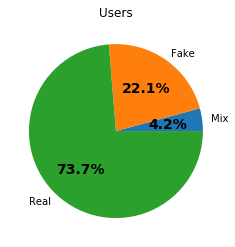

In [27]:
mix_users = []
for e in fake_users_dict:
    if e in real_users_dict:
        mix_users.append((e, fake_users_dict[e]/(fake_users_dict[e] + real_users_dict[e])))

mix_users.sort(key=lambda x: -x[1])

for e in mix_users[:10]:
    print(e)
print()
for e in mix_users[-10:]:
    print(e)
        
print("Mix: ", len(mix_users))
print("Fake: ", len(fake_users_dict.keys()) - len(mix_users))
print("Real: ", len(real_users_dict.keys()) - len(mix_users))

plot_pie([len(mix_users), len(fake_users_dict.keys()) - len(mix_users), len(real_users_dict.keys()) - len(mix_users)], ['Mix', 'Fake', 'Real'], "Users")

# Vader

In [28]:
analyzer = SentimentIntensityAnalyzer()

In [29]:
fake_tweets_text = [tweet['text'] for tweet in fake_tweets_data]
real_tweets_text = [tweet['text'] for tweet in real_tweets_data]

In [30]:
fake_tweets_text[0]

'Pope Francis Saying ‘Jesus Is Metaphorical, Not Literal’ During Mass Is A Fake Quote https://t.co/lytPnaJZSC'

In [31]:
fake_vs = [analyzer.polarity_scores(text) for text in fake_tweets_text]
real_vs = [analyzer.polarity_scores(text) for text in real_tweets_text]

In [32]:
real_vs[0]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [33]:
fake_vs_pos = [e['pos'] for e in fake_vs]
fake_vs_neg = [e['neg'] for e in fake_vs]
fake_vs_neu = [e['neg'] for e in fake_vs]
fake_vs_comp = [e['compound'] for e in fake_vs]


real_vs_pos = [e['pos'] for e in real_vs]
real_vs_neg = [e['neg'] for e in real_vs]
real_vs_neu = [e['neg'] for e in real_vs]
real_vs_comp = [e['compound'] for e in real_vs]

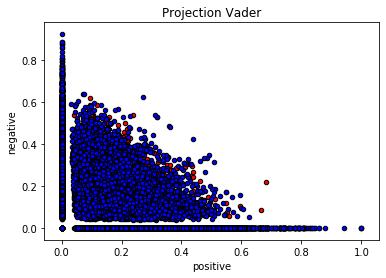

In [34]:
plt.figure()
plt.scatter(fake_vs_pos, fake_vs_neg, c="red", s=20, edgecolor='k')
plt.scatter(real_vs_pos, real_vs_neg, c="blue",s=20, edgecolor='k')
plt.title("Projection Vader")
plt.xlabel("positive")
plt.ylabel("negative")
plt.show()

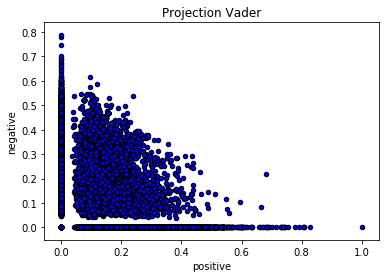

In [35]:
plt.figure()
plt.scatter(fake_vs_pos, fake_vs_neg, c="blue", s=20, edgecolor='k')
plt.title("Projection Vader")
plt.xlabel("positive")
plt.ylabel("negative")
plt.show()

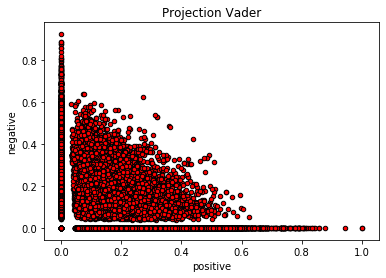

In [36]:
plt.figure()
plt.scatter(real_vs_pos, real_vs_neg, c="red", s=20, edgecolor='k')
plt.title("Projection Vader")
plt.xlabel("positive")
plt.ylabel("negative")
plt.show()

In [37]:
fake_vs_pos = [e['pos'] for e in fake_vs]
fake_vs_neg = [e['neg'] for e in fake_vs]
fake_vs_neu = [e['neg'] for e in fake_vs]
fake_vs_comp = [e['compound'] for e in fake_vs]


real_vs_pos = [e['pos'] for e in real_vs]
real_vs_neg = [e['neg'] for e in real_vs]
real_vs_neu = [e['neg'] for e in real_vs]
real_vs_comp = [e['compound'] for e in real_vs]

In [38]:
print("fake pos: {}".format(average(fake_vs_pos)))
print("fake neg: {}".format(average(fake_vs_neg)))
print("fake neu: {}".format(average(fake_vs_neu)))
print("fake comp: {}".format(average(fake_vs_comp)))

print()

print("real pos: {}".format(average(real_vs_pos)))
print("real neg: {}".format(average(real_vs_neg)))
print("real neu: {}".format(average(real_vs_neu)))
print("real comp: {}".format(average(real_vs_comp)))

fake pos: 0.05285020668313975
fake neg: 0.11775574440571002
fake neu: 0.11775574440571002
fake comp: -0.13284192088307034

real pos: 0.07247674791347054
real neg: 0.056221343797189585
real neu: 0.056221343797189585
real comp: 0.034695777122933806


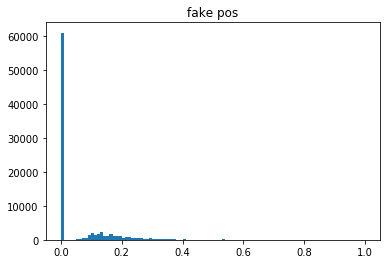

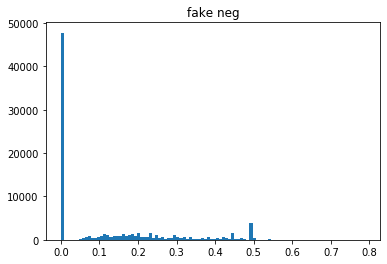

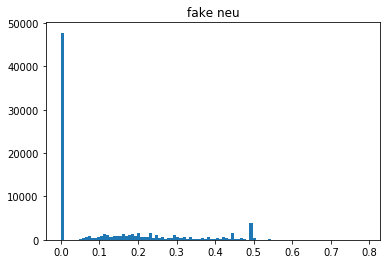

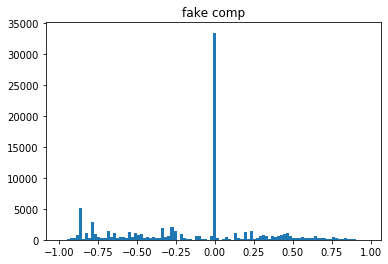

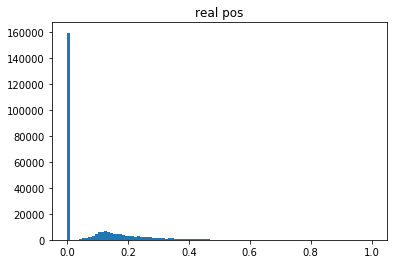

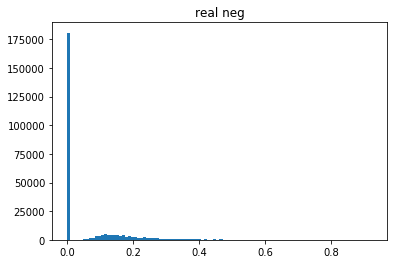

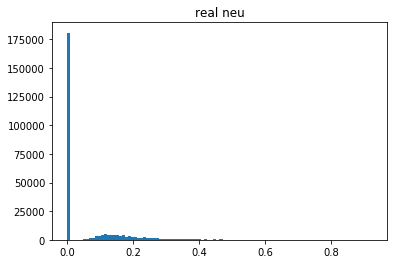

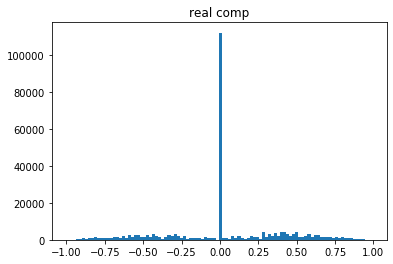

In [39]:
plot_hist(fake_vs_pos, "fake pos")
plot_hist(fake_vs_neg, "fake neg")
plot_hist(fake_vs_neu, "fake neu")
plot_hist(fake_vs_comp, "fake comp")

plot_hist(real_vs_pos, "real pos")
plot_hist(real_vs_neg, "real neg")
plot_hist(real_vs_neu, "real neu")
plot_hist(real_vs_comp, "real comp")

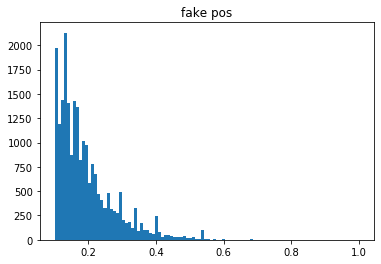

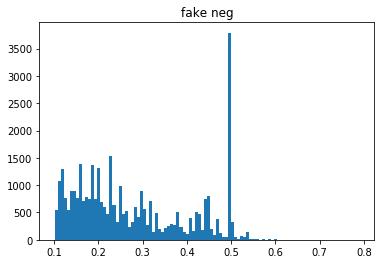

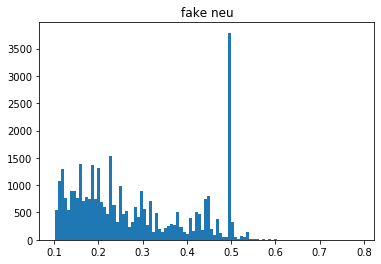

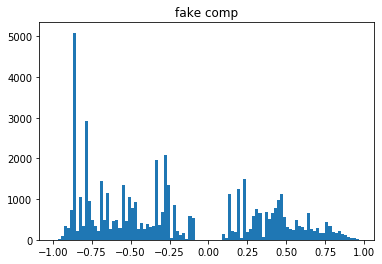

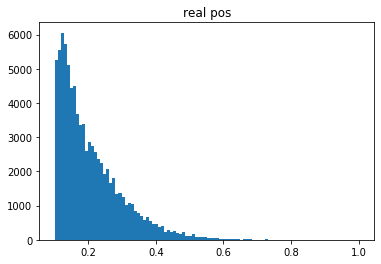

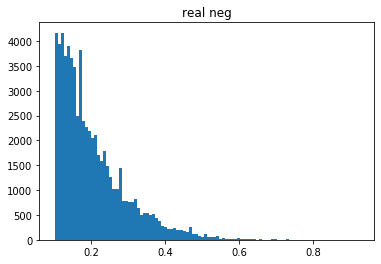

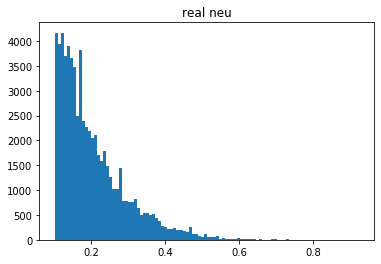

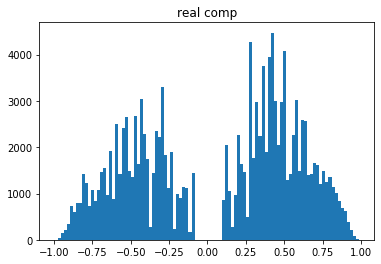

In [40]:
threshold = 0.1
plot_hist([e for e in fake_vs_pos if abs(e) > threshold], "fake pos")
plot_hist([e for e in fake_vs_neg if abs(e) > threshold], "fake neg")
plot_hist([e for e in fake_vs_neu if abs(e) > threshold], "fake neu")
plot_hist([e for e in fake_vs_comp if abs(e) > threshold], "fake comp")

plot_hist([e for e in real_vs_pos if abs(e) > threshold], "real pos")
plot_hist([e for e in real_vs_neg if abs(e) > threshold], "real neg")
plot_hist([e for e in real_vs_neu if abs(e) > threshold], "real neu")
plot_hist([e for e in real_vs_comp if abs(e) > threshold], "real comp")

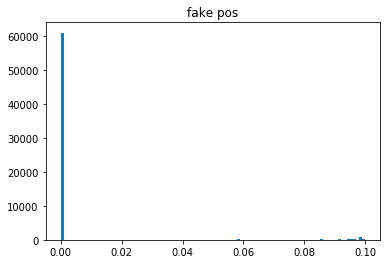

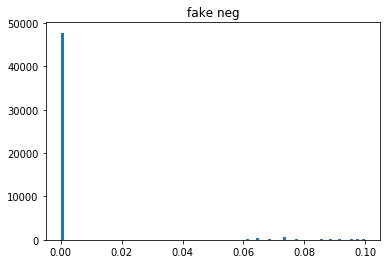

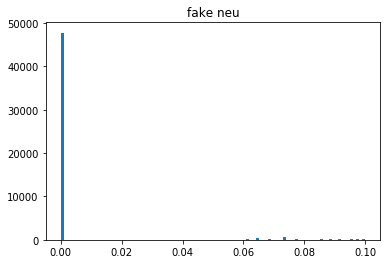

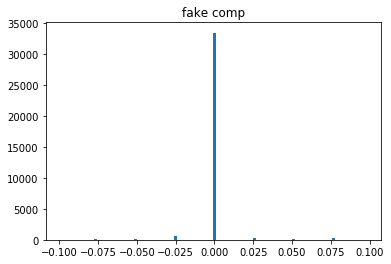

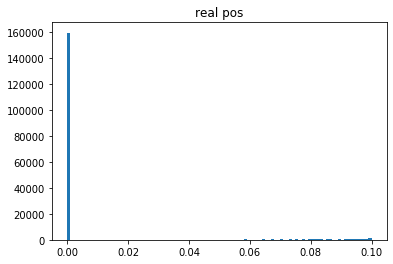

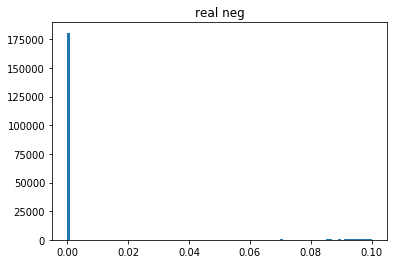

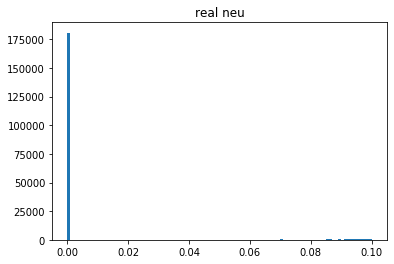

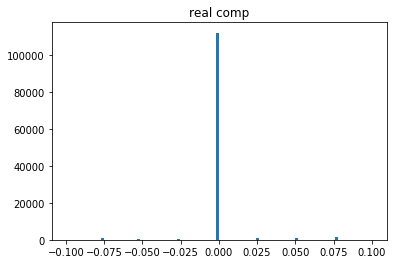

In [41]:
threshold = 0.1
plot_hist([e for e in fake_vs_pos if abs(e) <= threshold], "fake pos")
plot_hist([e for e in fake_vs_neg if abs(e) <= threshold], "fake neg")
plot_hist([e for e in fake_vs_neu if abs(e) <= threshold], "fake neu")
plot_hist([e for e in fake_vs_comp if abs(e) <= threshold], "fake comp")

plot_hist([e for e in real_vs_pos if abs(e) <= threshold], "real pos")
plot_hist([e for e in real_vs_neg if abs(e) <= threshold], "real neg")
plot_hist([e for e in real_vs_neu if abs(e) <= threshold], "real neu")
plot_hist([e for e in real_vs_comp if abs(e) <= threshold], "real comp")

In [47]:
fake_arts_with_content[0].content['text']

'NYC: PHYSICIAN and Wife Jump To Death…Leave Kids Behind Because They “Can’t Afford The Health Care” Only Hours After McCain, Murkowski, Collins and EVERY Democrat Voted To Keep Obamacare\n\nHealth Care. One sentence in a NYC couple’s suicide note tells the story of how so many Americans are feeling about health care these days. With premiums skyrocketing, it’s difficult to pay for healthcare even if you don’t have “medical issues” like this couple did. This is tragic and is symbolic of the desperation so many people are feeling right now.\n\nA Manhattan couple committed suicide just a few hours after Senate Republicans tried to pass a bill that would repeal Obamacare.\n\nBut three members of their own party – including Sen. John McCain – voted against the bill and it failed to pass, keeping the Affordable Care Act in place for now.\n\nThe couple jumped out of a window of a New York City office building together in desperation over their inability to afford their health care: ‘We both 

In [52]:
a = [x for x in fake_arts_with_content if x.content['text'] != '']
b = [x for x in fake_arts_with_content if x.content['text'] == '']

In [53]:
len(a)

372

In [54]:
len(b)

34

In [60]:
b[5].content['title']

'Tennessee GOP Twitter taken down, after Tweet exposing Pelosi involved in Pedophilia'